In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import cm
from IPython.html.widgets import interact
import pickle

%matplotlib inline

In [28]:
dataset = pickle.load(open('testoutput.json', 'rb'))

data_names = ('Net Quantity', 'Net Keep Qty', 'Learning Rate', 'Weight Decay Rate',  
         'First Layer Nodes', 'Second Layer Nodes', 'Learning Epochs', 
         'Training Set Size', 'Training Batch Size', 'Effectiveness')

for name in data_names:
    dataset[name] = [x for y,x in sorted(zip(dataset['Effectiveness'], dataset[name]))[::-1]]

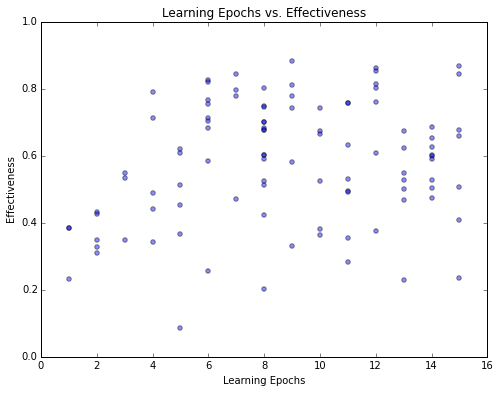

In [34]:
def create_plot(dataname):
    plt.scatter(dataset[dataname], dataset['Effectiveness'], alpha=0.45)
    plt.gcf().set_size_inches(8, 6)
    plt.xlabel(dataname)
    plt.ylabel('Effectiveness')
    plt.title(dataname + ' vs. Effectiveness')
    
interact(create_plot, dataname=data_names)

<function __main__.create_avg_plot>

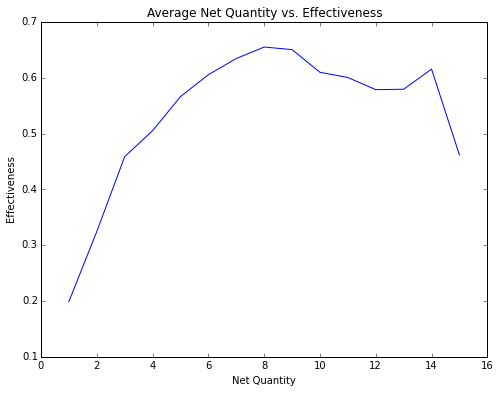

In [73]:
def create_avg_plot(dataname, smoothing=4):
    data = dataset[dataname]
    eff = dataset['Effectiveness']
    boxes = []
    if type(min(data)) == float: boxes = np.linspace(min(data), max(data)+0.000001, min(data))
    else: boxes = np.linspace(min(data), max(data), max(data) - min(data) + 1)
    
    new_boxes = []
    new_eff = []
    for i in boxes:
        tmp = [y for x, y in zip(data, eff) if x == i]
        if len(tmp) == 0: continue
        new_eff.append(sum(tmp) / float(len(tmp)))
        new_boxes.append(i)
    
    if len(new_eff) == 0: return
    
    new_eff_smooth = np.convolve(new_eff, np.ones(smoothing)/float(smoothing), 'same')

    plt.plot(new_boxes, new_eff_smooth)
    plt.gcf().set_size_inches(8, 6)
    plt.xlabel(dataname)
    plt.ylabel('Effectiveness')
    plt.title('Average ' + dataname + ' vs. Effectiveness')
    
interact(create_avg_plot, dataname=data_names, smoothing=(1, 10, 1))

In [59]:
def best_setup(count):
    for name in data_names:
        print(name + ": ", float(sum(dataset[name][0:count]))/float(count))
        
interact(best_setup, count=(1, len(dataset['Effectiveness'])))

Net Quantity:  9.28
Net Keep Qty:  4.66
Learning Rate:  1.0380000000000003
Weight Decay Rate:  0.0005360000000000001
First Layer Nodes:  20.94
Second Layer Nodes:  0.0
Learning Epochs:  9.48
Training Set Size:  611.54
Training Batch Size:  4.98
Effectiveness:  0.7286799999999997


<function __main__.best_setup>